# MVP Análise de Dados e Boas Práticas

**Nome:** Ednilson Bastos do Amaral

**Matrícula:** 40530010055_20250_01

**Dataset:** cancer de pulmão (https://www.kaggle.com/datasets/amankumar094/lung-cancer-dataset/data)



# Descrição do Problema

Este conjunto de dados contém dados sobre mortalidade por câncer de pulmão e é uma coleção abrangente de
informações sobre pacientes, com foco específico em indivíduos diagnosticados com câncer. Este conjunto de dados contém informações abrangentes sobre 222.684 indivíduos relacionadas ao diagnóstico, tratamento e desfechos do câncer de pulmão. Com 17 colunas bem estruturadas, este conjunto de dados em larga escala foi projetado para auxiliar pesquisadores, cientistas de dados e profissionais de saúde no estudo de padrões, na construção de modelos preditivos e no aprimoramento de estratégias de detecção precoce e tratamento.

## Hipóteses do Problema

As hipóteses traçadas são as seguintes:

1. ***O índice de massa corporal do paciente, O nível de colesterol do paciente, a hipertensão arterial e a sobrevivência tem correlação?***

2. ***Considerando idade (jovens, adultos, idosos), quais grupos demográficos são mais vulneráveis ao câncer de pulmão?***

3. ***Taxa de sobrevida por tipo de tratamento com grupo etário (jovens, adultos, idosos)?***

## Tipo de Problema ##

Este é um problema de **classificação supervisionada**. A problemática central desta investigação reside em três pilares: a determinação da correlação e do impacto de fatores biométricos e cardiovasculares na sobrevida dos indivíduos; a identificação de grupos de risco específicos por idade; e a análise aprofundada do prognóstico (sobrevida) e da eficácia dos tratamentos considerando distintos subgrupos etários.

## Seleção de Dados

O dataset câncer de pulmão é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, porém os dados terão que passar pelo processo de limpeza, pré-processamento  e transformação para os dados ficarem prontos para o aprendizado de máquina.

## Atributos do Dataset

O dataset câncer de pulmão contém 222.684 mil amostras, Possui 17 atributos:

- ***id*** - Um identificador exclusivo para cada paciente no conjunto de dados.
- ***age*** - A idade do paciente no momento do diagnóstico.
- ***gender*** - O sexo do paciente (por exemplo, masculino, feminino).
- ***country:*** - O país ou região onde o paciente reside.
- ***diagnosis_date*** - A data em que o paciente foi diagnosticado com câncer de pulmão.
- ***cancer_stage*** - O estágio do câncer de pulmão no momento do diagnóstico (por exemplo, Estágio I, Estágio II,Estágio III, Estágio IV).
- ***family_history*** - Indica se há histórico familiar de câncer (por exemplo, sim, não).
- ***smoking_status*** - O status de fumante do paciente (por exemplo, fumante atual, ex-fumante,nunca fumou, fumante passivo).
- ***bmi*** - O índice de massa corporal do paciente no momento do diagnóstico.
- ***cholesterol_level*** - O nível de colesterol do paciente (valor).
- ***hypertension*** - indica se o paciente tem hipertensão (pressão alta) (por exemplo,sim, não).
- ***asthma*** - indica se o paciente tem asma (por exemplo, sim, não).
- ***cirrhosis*** - indica se o paciente tem cirrose hepática (por exemplo, sim, não).
- ***other_cancer*** - indica se o paciente teve algum outro tipo de câncer além
do diagnóstico principal (por exemplo, sim, não).
- ***treatment_type*** - o tipo de tratamento que o paciente recebeu (por exemplo, cirurgia, quimioterapia, radiação, combinado).
- ***end_treatment_date*** - a data em que o paciente concluiu o tratamento contra o câncer.
- ***survived*** - indica se o paciente sobreviveu (por exemplo, sim, não).
'

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset cãncer de pulmão.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [123]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Cria as classes para carregamento e Tratamento do dados - princípios SOLID

In [124]:
# Crei uma classe carregador com um método "carrega_dataset" para carregar os dados do dataset cancer pulmão
class Carregador:
  def carrega_dataset(url:str, colunas:list):
    # Lê o arquivo utilizando as colunas informadas
    dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

    # guardo o dataset em um dataframe
    df = pd.DataFrame(data=dataset, columns=colunas)

    return df


In [125]:
class Analisador:
  def totalinstancia(dados):
    print(f"Total de instâncias: {len(dados)}")

  def tipodados(dados):
    print("\nTipos de dados por coluna:")
    print(dados.info())

  def mostralinhas(dados,qtd,posicao):
    #P = Printa as  primeiras Linhas
    if posicao == 'P':
     return  dados.head(qtd)
    else:
      #Printa as ultimas
      return dados.tail(qtd)



In [126]:
class Estatistica:
  def dadosestatistico(dados):
    return dados.describe()

  def media(dados):
    return dados.describe().loc['mean']

  def desviopadrao(dados):
    return dados.describe().loc['std']



In [127]:
class tratamentolimpeza:
  def mosranulos(dados):
      return dados.isnull().sum()

  def alteratipoidade(dados):
     dados['age'] = dados['age'].astype(int)


  def agrupa_idade_tratamento(dados):
    dados_grupo = dados.groupby(['idade_grupo', 'treatment_type'])['survived'].mean().unstack()
    return dados_grupo


  def grupo_idade(dados):
      def categoria_idade(age):
          if age <= 30:
              return 'Jovem'
          elif 31 >= age <= 60:
              return 'Meia idade'
          else:
              return 'Idoso'
      dados['idade_grupo'] = dados['age'].apply(categoria_idade)
      df_grupoidade = dados.groupby('idade_grupo')['survived'].mean().sort_values(ascending=True )
      return  df_grupoidade




In [128]:
class graficos_geral:
  def grf_hetmeap(dados,colunas,titulo):
    #Verificar a correlação entres os atributos usando o gráfico do tipo hetmap
    correlation_matrix = dados[colunas].corr()
    plt.figure(figsize=(7,5))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(titulo,fontsize=10)
    plt.tight_layout()
    plt.show()

  def grf_histograma(dados,titulo,xlabel,ylabel):
    plt.figure(figsize=(7, 5))
    sns.histplot(dados['age'], bins=20, kde=True)
    plt.title(titulo,fontsize=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

  def grf_barras(dados,variaveis, valores_medios, titulo,xlabel,ylabel):
    # Criando o gráfico de barras
    plt.figure(figsize=(7, 5)) # Ajuste o tamanho do gráfico para melhor visualização
    plt.bar(variaveis, valores_medios, color='skyblue')

    # Adicionando rótulos e título
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor leitura
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid horizontal para facilitar a leitura dos valores

    plt.tight_layout() # Ajusta o layout para evitar cortes nos rótulos
    plt.show()

  def grf_barras_plot(dados,titulo,xlabel,ylabel,rotaciona):

    plt.figure(figsize=(7, 5)) # Define o tamanho da figura
    sns.barplot(x='Variável', y='Desvio Padrão', data=dados, palette='viridis') # Cria o gráfico de barras

    plt.title(titulo, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Rotaciona os rótulos do eixo X se necessário para melhor legibilidade
    plt.xticks(rotation=rotaciona, ha='right') # ha='right' alinha o texto à direita da marca

    # Adiciona o valor do desvio padrão em cima de cada barra (opcional, mas útil)
    for index, row in dados.iterrows():
      plt.text(index, row['Desvio Padrão'] + 1, round(row['Desvio Padrão'], 2),
             color='black', ha="center", va='bottom', fontsize=10) # +1 para não colar na barra

    plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade horizontal para facilitar a leitura
    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

  def grf_barras_simples(dados,titulo,xlabel,ylabel):
    plt.figure(figsize=(7,5))
    sns.barplot(x=dfmd_grupo.index, y=dfmd_grupo.values, palette ='pastel')
    plt.title(titulo, fontsize = 11)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0,0.25)
    plt.grid(True)
    plt.show()

  def grf_barras_empilhadas(dados,titulo,xlabel,ylabel, legenda):
    dados.plot(kind='bar', stacked=True, figsize=(7, 5))
    plt.title(titulo, fontsize=12)
    plt.xlabel(xlabel, fontsize=8)
    plt.ylabel(ylabel, fontsize=8)
    plt.ylim(0, 1)
    plt.legend(title=legenda, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

  def grf_distribuicao(dados):
      dados.hist(figsize = (7,5))
      plt.show()


# Carrega os dados do github para o dataframe

In [129]:
#Faz a instancia da classe Carregador
carregador = Carregador()

#caminho no github para carregar o arquivo "cancer_pulmao.csv".
url = "https://raw.githubusercontent.com/EdnilsonBastos/Analise_exploratoria/refs/heads/main/cancer_pulmao.csv"

#atributos do arquivo "cancer_pulmao.csv"
colunas = ['id','age','gender','country','diagnosis_date','cancer_stage','family_history','smoking_status','bmi','cholesterol_level','hypertension','asthma','cirrhosis','other_cancer','treatment_type','end_treatment_date','survived']

#Chama o método "carrega_dataset" que é um método que esta na classe Carregador que vai carregar os dados para o dataset "cancer" .
df = Carregador.carrega_dataset(url=url,colunas=colunas)



#Seleção sas colunas que são features

In [130]:
# Lista com os nomes das colunas que você quer selecionar
colunas_selecionadas = ['age', 'bmi','cholesterol_level','hypertension','treatment_type', 'survived']

# Cria um novo DataFrame contendo apenas as colunas selecionadas
df_cancer = df[colunas_selecionadas]

In [131]:
#  5 primeiras linhas
print("Resultado 5 primeiras linhas do dataframe")
resultado_mostralinha= Analisador.mostralinhas(df_cancer,5,'P')
print(resultado_mostralinha)


Resultado 5 primeiras linhas do dataframe
    age   bmi  cholesterol_level  hypertension treatment_type  survived
0  64.0  29.4                199             0   Chemotherapy         0
1  50.0  41.2                280             1        Surgery         1
2  65.0  44.0                268             1       Combined         0
3  51.0  43.0                241             1   Chemotherapy         0
4  37.0  19.7                178             0       Combined         0


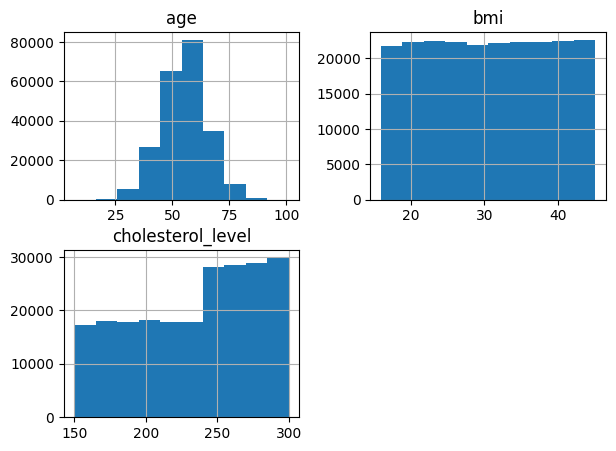

In [132]:
df_hist =df_cancer[['age','bmi','cholesterol_level']]
graficos_geral.grf_distribuicao(df_hist)

A distribuição da idade mostra uma concentração de indivíduos em torno da meia-idade. Há um pico proeminente entre 50 e 60 anos.

 A distribuição do BMI é notavelmente uniforme ou retangular.

A distribuição do nível de colesterol é peculiar e não segue um padrão comum como a distribuição normal.

In [133]:
# 5 últimas linhas
print("Resultado 5 ultimas linhas do dataframe")
resultado_mostralinha= Analisador.mostralinhas(df_cancer,5,'')
print(resultado_mostralinha)

Resultado 5 ultimas linhas do dataframe
         age   bmi  cholesterol_level  hypertension treatment_type  survived
222679  66.0  36.8                263             1       Combined         0
222680  63.0  43.6                251             1        Surgery         0
222681  59.0  31.3                253             1   Chemotherapy         0
222682  61.0  35.7                287             1        Surgery         0
222683  47.0  21.0                184             1        Surgery         1


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset câncer de pulmão, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset câncer de pulmão possui 222.684 instâncias, sendo que o atributo  (bmi,age) é float, os atributos(cholesterol_level,hypertension,survived) são de tipo numérico (int), enquanto o atributo (treatment_type, idade_grupo(*atributo criado)) são categóricos.

In [134]:
resultado_instancia =  Analisador.totalinstancia(df_cancer)
print(resultado_instancia)

Total de instâncias: 222684
None


In [135]:
resultado_tipo =  Analisador.tipodados(df_cancer)
print(resultado_tipo)


Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222684 entries, 0 to 222683
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                222684 non-null  float64
 1   bmi                222684 non-null  float64
 2   cholesterol_level  222684 non-null  int64  
 3   hypertension       222684 non-null  int64  
 4   treatment_type     222684 non-null  object 
 5   survived           222684 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 10.2+ MB
None
None


In [136]:
print("Mostra se tem dados nulo no dataframe")
resultado_nulos= tratamentolimpeza.mosranulos(df_cancer)
print(resultado_nulos)


Mostra se tem dados nulo no dataframe
age                  0
bmi                  0
cholesterol_level    0
hypertension         0
treatment_type       0
survived             0
dtype: int64


In [137]:
print('atributo idade foi alterado de float para inteiro')
tratamentolimpeza.alteratipoidade(df_cancer)
#resultado_tipo =  Analisador.tipodados(df_cancer)
print(df_cancer['age'].head(1))



atributo idade foi alterado de float para inteiro
0    64
Name: age, dtype: int64


***Esse gráfico é uma matriz de correlação (heatmap)*** -- Que mostra as relações entre quatro variáveis: "bmi" (Índice de Massa Corporal), "cholesterol_level" (Nível de Colesterol), "hypertension" (Hipertensão) e "survived" (Sobrevivência). Os valores nas células variam de -1 a 1, onde:
1.00 indica uma correlação positiva perfeita (as variáveis se movem na mesma direção).
-1.00 indica uma correlação negativa perfeita (as variáveis se movem em direções opostas).
0.00 indica ausência de correlação linear.

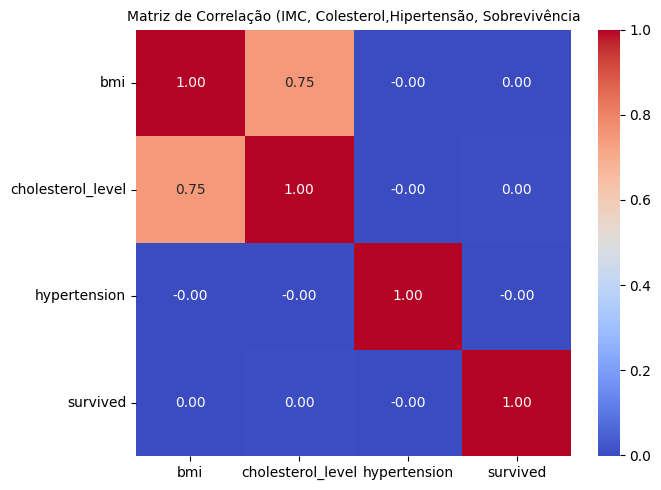

In [138]:
#Verificar a correlação entres os atributos usando o gráfico do tipo hetmap
colunas = ['bmi', 'cholesterol_level','hypertension','survived']
graficos_geral.grf_hetmeap(df_cancer,colunas,'Matriz de Correlação (IMC, Colesterol,Hipertensão, Sobrevivência')


Vamos analisar cada par de variáveis:


***BMI e Cholesterol_level:*** A correlação é de 0.75. Isso indica uma forte correlação positiva. Pessoas com maior IMC tendem a ter níveis de colesterol mais altos, e vice-versa.

Há uma forte correlação positiva entre BMI e Cholesterol_level (0.75). Isso significa que essas duas variáveis tendem a aumentar ou diminuir juntas.
Não há correlação linear significativa entre nenhuma das outras combinações de variáveis (BMI/Hypertension, BMI/Survived, Cholesterol_level/Hypertension, Cholesterol_level/Survived, Hypertension/Survived). Os valores próximos a 0.00 indicam que, com base nessa análise linear, essas variáveis não têm uma relação direta e previsível entre si.



***Distribuição etária entre pacientes com câncer*** -- É um histograma que mostra a frequência (número de pacientes) por faixa etária, com uma curva de densidade estimada sobreposta, que se assemelha a uma distribuição normal

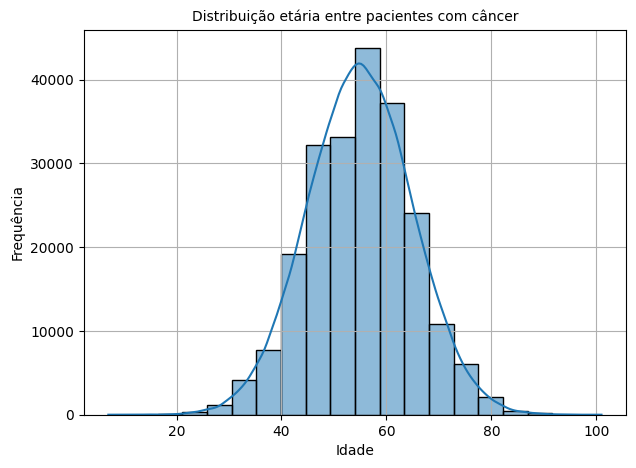

In [139]:
graficos_geral.grf_histograma(df_cancer,'Distribuição etária entre pacientes com câncer','Idade','Frequência')

O gráfico ilustra que o câncer é mais prevalente em indivíduos de meia-idade a idosos, com um pico significativo de incidência por volta dos 55-60 anos de idade. Embora possa ocorrer em qualquer idade, é menos comum em pessoas muito jovens e a frequência diminui novamente em idades muito avançadas. Essa distribuição é consistente com o conhecimento geral de que o risco de câncer aumenta com a idade.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [140]:
print("Estatísticas descritivas básicas do dataset")
resultado_estatistico = Estatistica.dadosestatistico(df_cancer)
print(resultado_estatistico)

Estatísticas descritivas básicas do dataset
                 age            bmi  cholesterol_level   hypertension  \
count  222684.000000  222684.000000      222684.000000  222684.000000   
mean       55.003929      30.495024         233.734795       0.751311   
std         9.991233       8.374935          43.453774       0.432254   
min         7.000000      16.000000         150.000000       0.000000   
25%        48.000000      23.200000         197.000000       1.000000   
50%        55.000000      30.500000         242.000000       1.000000   
75%        62.000000      37.800000         271.000000       1.000000   
max       101.000000      45.000000         300.000000       1.000000   

            survived  
count  222684.000000  
mean        0.219562  
std         0.413951  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


In [141]:
# média dos atributos numéricos do dataframe
#Chama o método "media" da classe "Estatistica".
#Estatistica.media(df_cancer)
print("Resultado da Média:")
resultado_media = Estatistica.media(df_cancer)
print(resultado_media)

Resultado da Média:
age                   55.003929
bmi                   30.495024
cholesterol_level    233.734795
hypertension           0.751311
survived               0.219562
Name: mean, dtype: float64


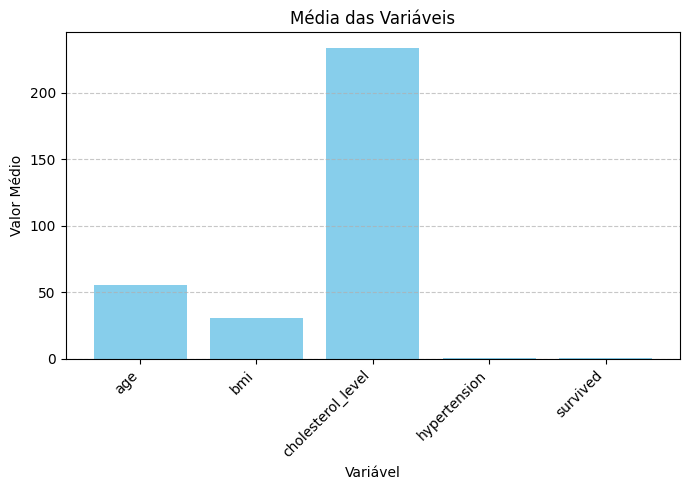

In [142]:
df_media = df_cancer.describe().loc['mean']

variaveis = list(df_media.keys())
valores_medios = list(df_media.values)

graficos_geral.grf_barras(df_media,variaveis,valores_medios,'Média das Variáveis','Variável','Valor Médio')

O gráfico destaca que as variáveis numéricas como idade, IMC e, especialmente, o nível de colesterol, têm valores médios significativos. O nível de colesterol se destaca como o mais alto, o que poderia ser uma preocupação em termos de saúde pública ou no contexto da população estudada. As variáveis binárias (provavelmente "hypertension" e "survived") têm médias muito baixas, indicando que a proporção de ocorrência desses eventos é pequena.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [143]:
# desvio padrão dos atributos numéricos do dataframe
#Chama o método "desviopadrao" da classe "Estatistica".
print("Resultado do Desvio padrão:")
resultado_DV = Estatistica.desviopadrao(df_cancer)
print(resultado_DV)



Resultado do Desvio padrão:
age                   9.991233
bmi                   8.374935
cholesterol_level    43.453774
hypertension          0.432254
survived              0.413951
Name: std, dtype: float64


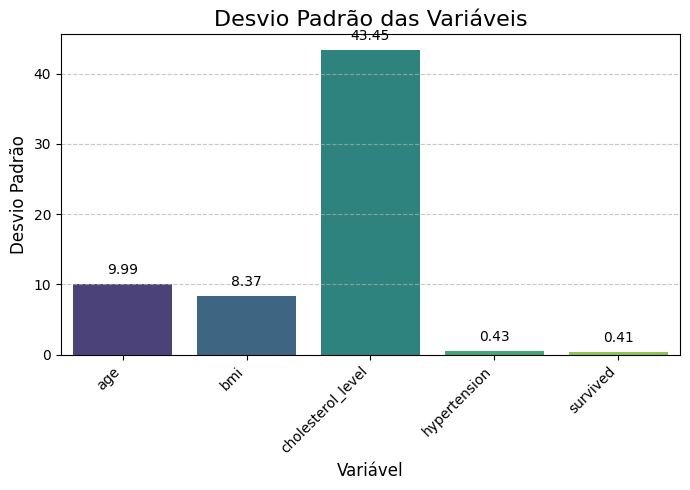

In [144]:
df_plot = resultado_DV.reset_index()
df_plot.columns = ['Variável', 'Desvio Padrão']
graficos_geral.grf_barras_plot(df_plot,'Desvio Padrão das Variáveis','Variável','Desvio Padrão',45)

***TAXA DE SOBREVIVÊNCIA POR FAIXA ETÁRIA*** -- A exibição de um gráfico de barras fornece uma análise comparativa das taxas de sobrevivência em três faixas etárias distintas: jovens, de meia-idade e idosos. O objetivo é identificar tendências nas taxas de sobrevivência relacionadas as faixas etárias.

In [145]:
dfmd_grupo = tratamentolimpeza.grupo_idade(df_cancer)
dfmd_grupo

,survived
idade_grupo,
Jovem,0.216096
Idoso,0.219556
Meia idade,0.233266


O gráfico apresentado, novamente intitulado "Taxa de sobrevivência por faixa etária", é um gráfico de barras que compara as taxas de sobrevivência entre três grupos etários: "Jovem", "Idoso" e "Meia idade".

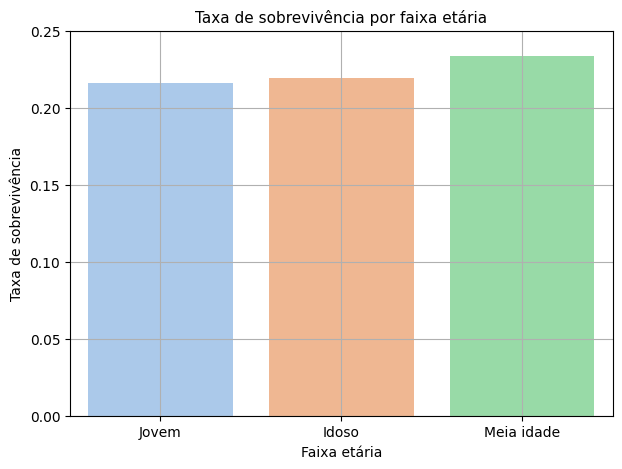

In [146]:
graficos_geral.grf_barras_simples(dfmd_grupo,'Taxa de sobrevivência por faixa etária','Faixa etária','Taxa de sobrevivência')

O gráfico reitera que a taxa de sobrevivência é mais elevada na faixa etária de "Meia idade" em comparação com os grupos "Jovem" e "Idoso". Os grupos "Jovem" e "Idoso" têm taxas de sobrevivência muito próximas entre si e são as mais baixas

In [147]:
df_idade_tratamento = tratamentolimpeza.agrupa_idade_tratamento(df_cancer)
df_idade_tratamento

treatment_type,Chemotherapy,Combined,Radiation,Surgery
idade_grupo,,,,
Idoso,0.218013,0.218955,0.219240,0.222023
Jovem,0.245192,0.181579,0.222520,0.212714
Meia idade,0.268116,0.268293,0.198113,0.190476


O gráfico ilustra a composição dos regimes de tratamento (Quimioterapia, Combinado, Radioterapia, Cirurgia) para cada uma das três faixas etárias (Idoso, Jovem, Meia idade).

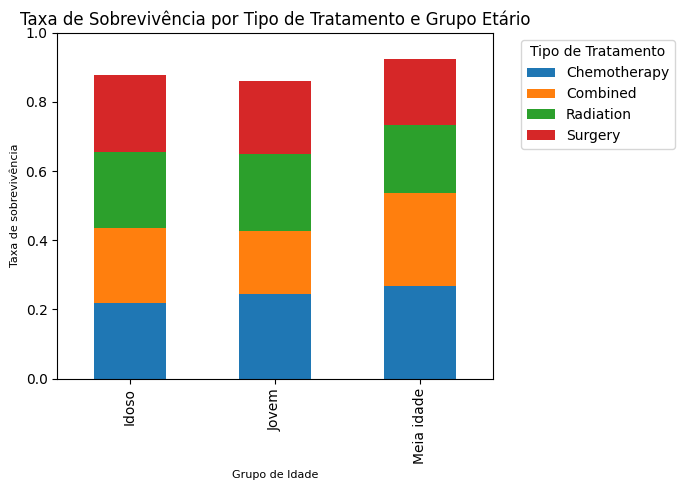

In [148]:
graficos_geral.grf_barras_empilhadas(df_idade_tratamento,'Taxa de Sobrevivência por Tipo de Tratamento e Grupo Etário','Grupo de Idade','Taxa de sobrevivência','Tipo de Tratamento')

Em resumo, o gráfico é útil para entender como os diferentes tipos de tratamento se distribuem entre os grupos etários. A "Meia idade" se destaca por uma maior proporção de cirurgia, e há pequenas variações na radioterapia, enquanto a quimioterapia e o tratamento combinado são mais uniformes entre os grupos.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [149]:
# Separar features (X) e target (y)
X = df_cancer.drop('survived', axis=1)
y = df['survived']

In [150]:
# Dividir os dados em conjuntos de treino em 80% e de teste em 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [151]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (178147, 6)
Dimensões de X_test: (44537, 6)
Dimensões de y_train: (178147,)
Dimensões de y_test: (44537,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.
Atributos(age,bmi,cholesterol_level) - São colunas numéricas contínuas, por este motivo a  normalização é apropriada para estas colunas devido às suas escalas.



In [152]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [153]:
# Aprende min e max APENAS de X_train
#Definir as colunas a serem normalizadas
colunas_normalizar = ['age', 'bmi', 'cholesterol_level']

scaler_norm.fit(X_train[colunas_normalizar])
X_train_normalized = scaler_norm.transform(X_train[colunas_normalizar])
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test[colunas_normalizar])

# Criar DataFrames com os valores normalizados
# É CRUCIAL passar o 'index' para garantir o alinhamento correto
X_train_normalized_df = pd.DataFrame(X_train_normalized,
                                     columns=colunas_normalizar,
                                     index=X_train.index)

X_test_normalized_df = pd.DataFrame(X_test_normalized,
                                    columns=colunas_normalizar,
                                    index=X_test.index)

#Recombinar os DataFrames: Juntar as colunas normalizadas com as não normalizadas
# Primeiro, identificar as colunas que NÃO serão normalizadas
# Neste caso, 'hypertension' e 'treatment_type' são as colunas restantes.
cols_not_normalized = ['hypertension','treatment_type','idade_grupo']

# Criar cópias das colunas não normalizadas para evitar SettingWithCopyWarning
X_train_non_normalized_df = X_train[cols_not_normalized].copy()
X_test_non_normalized_df = X_test[cols_not_normalized].copy()



# Concatenar as colunas normalizadas e não normalizadas
# Usamos axis=1 para concatenar colunas
X_train_processed = pd.concat([X_train_normalized_df, X_train_non_normalized_df], axis=1)

X_test_processed = pd.concat([X_test_normalized_df, X_test_non_normalized_df], axis=1)



In [154]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_processed, columns=X_train_processed.columns)

In [155]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head(5))


Primeiras 5 linhas dos dados normalizados (treino):
             age       bmi  cholesterol_level  hypertension treatment_type  \
15182   0.446809  0.320690           0.086667             1        Surgery   
173086  0.648936  0.527586           0.933333             1   Chemotherapy   
77858   0.691489  0.589655           0.713333             1       Combined   
56586   0.361702  0.689655           0.940000             1   Chemotherapy   
69976   0.510638  0.700000           0.680000             0        Surgery   

       idade_grupo  
15182        Idoso  
173086       Idoso  
77858        Idoso  
56586        Idoso  
69976        Idoso  


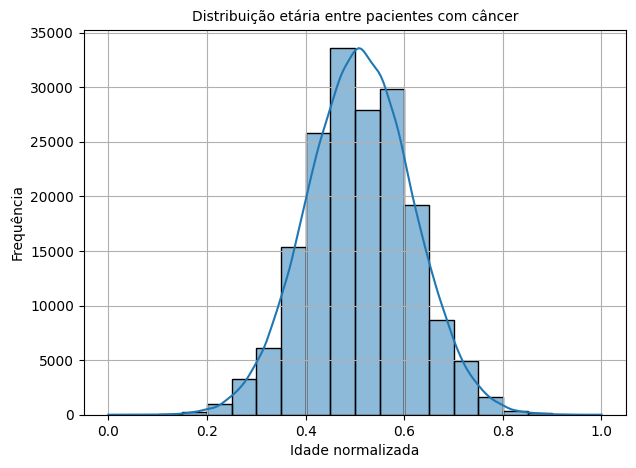

In [156]:
graficos_geral.grf_histograma(df_normalized,'Distribuição etária entre pacientes com câncer','Idade normalizada','Frequência')

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [157]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [158]:
# Aprende média e desvio padrão APENAS de X_train

colunas_padronizar = ['age', 'bmi', 'cholesterol_level']

scaler_std.fit(X_train[colunas_normalizar])
X_train_standardized = scaler_std.transform(X_train[colunas_padronizar])
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test[colunas_padronizar])

# Criar DataFrames com os valores padronizados
# É CRUCIAL passar o 'index' para garantir o alinhamento correto
X_train_standardized_df = pd.DataFrame(X_train_standardized,
                                     columns=colunas_padronizar,
                                     index=X_train.index)
X_test_standardized_df = pd.DataFrame(X_test_standardized,
                                    columns=colunas_padronizar,
                                    index=X_test.index)

#Recombinar os DataFrames: Juntar as colunas padronizadas com as não padronizadas
# Primeiro, identificar as colunas que NÃO serão padronizadas

cols_not_padronizar = ['hypertension','treatment_type','idade_grupo']

# Criar cópias das colunas não normalizadas para evitar SettingWithCopyWarning
X_train_non_standardized_df = X_train[cols_not_padronizar].copy()
X_test_non_standardized_df = X_test[cols_not_padronizar].copy()



# Concatenar as colunas normalizadas e não normalizadas
# Usamos axis=1 para concatenar colunas
X_train_processed = pd.concat([X_train_standardized_df, X_train_non_standardized_df], axis=1)

X_test_processed = pd.concat([X_test_standardized_df, X_test_non_standardized_df], axis=1)



In [159]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_processed, columns=X_train_processed.columns)

In [160]:
print("\nPrimeiras 10 linhas dos dados padronizados (treino):")
print(df_standardized.head(10))


Primeiras 10 linhas dos dados padronizados (treino):
             age       bmi  cholesterol_level  hypertension treatment_type  \
15182  -0.600457 -0.620829          -1.627292             1        Surgery   
173086  1.301685  0.095598           1.294558             1   Chemotherapy   
77858   1.702136  0.310526           0.535337             1       Combined   
56586  -1.401360  0.656798           1.317565             1   Chemotherapy   
69976   0.000219  0.692620           0.420304             0        Surgery   
91501   1.101460 -1.253672          -0.499964             1   Chemotherapy   
116313 -0.600457  1.707557           0.834424             0   Chemotherapy   
85207  -0.500345 -1.062625          -1.259185             1      Radiation   
9411   -1.701698  0.513513           1.110504             1       Combined   
169574 -0.400232 -1.170089          -0.753038             1   Chemotherapy   

       idade_grupo  
15182        Idoso  
173086       Idoso  
77858        Idoso  
565

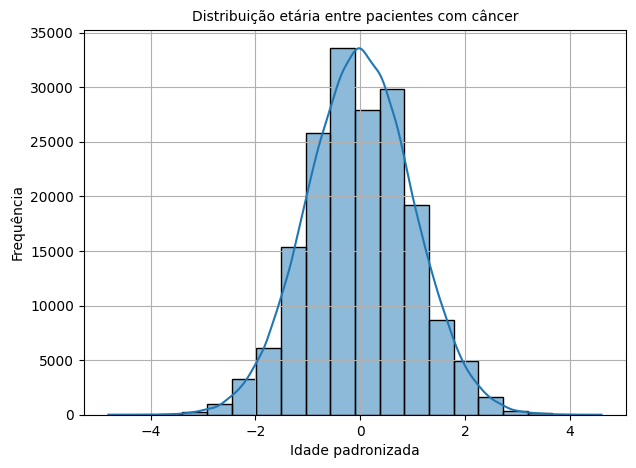

In [161]:
graficos_geral.grf_histograma(df_standardized,'Distribuição etária entre pacientes com câncer','Idade padronizada','Frequência')

O histograma de *idade* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

***OneHotEncoder***
Analisando as colunas treatment_type e idade_grupo, podemos ver que elas são variáveis categóricas (não numéricas). Para usar essas colunas em muitos modelos de machine learning, elas precisam ser convertidas em um formato numérico.

In [162]:
columns_to_encode = ['treatment_type', 'idade_grupo']
# handle_unknown='ignore': Ignora categorias que aparecerem no teste mas não no treino
# sparse_output=False: Retorna uma matriz densa (numpy array), mais fácil de converter para DataFrame
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar o encoder SOMENTE no conjunto de treino (X_train) ---
# Isso faz com que o encoder "aprenda" todas as categorias únicas presentes em X_train
encoder.fit(X_train[columns_to_encode])

# Transformar os conjuntos de treino e teste ---
# As colunas codificadas serão um array numpy
X_train_encoded_array = encoder.transform(X_train[columns_to_encode])
X_test_encoded_array = encoder.transform(X_test[columns_to_encode])

# --- 8. Obter os nomes das novas colunas criadas pelo encoder ---
# Isso é útil para criar DataFrames com nomes significativos
encoded_feature_names = encoder.get_feature_names_out(columns_to_encode)

# --- 9. Criar DataFrames com as colunas codificadas ---
X_train_encoded_df = pd.DataFrame(X_train_encoded_array, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded_array, columns=encoded_feature_names, index=X_test.index)

# --- 10. Concatenar as colunas codificadas de volta aos DataFrames originais (agora sem as colunas categóricas) ---
# Primeiro, remove as colunas categóricas originais
X_train_non_cat = X_train.drop(columns=columns_to_encode)
X_test_non_cat = X_test.drop(columns=columns_to_encode)

# Depois, concatena com as colunas codificadas
X_train_processed = pd.concat([X_train_non_cat, X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test_non_cat, X_test_encoded_df], axis=1)

In [163]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_encoder = pd.DataFrame(X_train_processed, columns=X_train_processed.columns)

In [164]:
print("\nPrimeiras 10 linhas dos dados encoding (treino):")
print(df_encoder.head(10))


Primeiras 10 linhas dos dados encoding (treino):
        age   bmi  cholesterol_level  hypertension  \
15182    49  25.3                163             1   
173086   68  31.3                290             1   
77858    72  33.1                257             1   
56586    41  36.0                291             1   
69976    55  36.3                252             0   
91501    66  20.0                212             1   
116313   49  44.8                270             0   
85207    50  21.6                179             1   
9411     38  34.8                282             1   
169574   51  20.7                201             1   

        treatment_type_Chemotherapy  treatment_type_Combined  \
15182                           0.0                      0.0   
173086                          1.0                      0.0   
77858                           0.0                      1.0   
56586                           1.0                      0.0   
69976                           0.0

# Conclusão

A análise e pré-processamento do dataset câncer de pulão demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo, normalizado, padronizado e algumas colunas sofrem o processo de ***One-hot encoding**. A análise exploratória revelou correlações importantes entre as características bmi e cholesterol_level a visualização do gráfico de hetmap demonstrou que há uma forte correlação positiva entre BMI e Cholesterol_level. O gráfico de barras reitera que a taxa de sobrevivência é mais elevada na faixa etária de "Meia idade" em comparação com os grupos "Jovem" e "Idoso".  gráfico de barras empilhada é útil para entender como os diferentes tipos de tratamento se distribuem entre os grupos etários. A "Meia idade" se destaca por uma maior proporção de cirurgia, e há pequenas variações na radioterapia, enquanto a quimioterapia e o tratamento combinado são mais uniformes entre os grupos. As etapas de normalização, padronização e one-hot encoding são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1. ***O índice de massa corporal do paciente, O nível de colesterol do paciente, a hipertensão arterial e a sobrevivência têm correlação?*** Sim, entre as características bmi e cholesterol_level a visualização do gráfico com hetmap demonstrou que há uma forte correlação positiva entre BMI e Cholesterol_level, os demais atributos não demonstram correlação.

2. ***Considerando idade (jovens, adultos, idosos), quais grupos demográficos são mais vulneráveis ao câncer de pulmão?***  O gráfico de barras reitera que a taxa de sobrevivência é mais elevada na faixa etária de "Meia idade" em comparação com os grupos "Jovem" e "Idoso". Os grupos "Jovem" e "Idoso" têm taxas de sobrevivência muito próximas entre si e são as mais baixas.

3. ***Taxa de sobrevida por tipo de tratamento com grupo etário (jovens, adultos, idosos)?*** O gráfico de barras empilhadas foi útil para entender como os diferentes tipos de tratamento se distribuem entre os grupos etários. A "Meia idade" se destaca por uma maior proporção de cirurgia, e há pequenas variações na radioterapia, enquanto a quimioterapia e o tratamento combinado são mais uniformes entre os grupos.